In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=1.5, font="Times New Roman", style="whitegrid")

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'
matplotlib.rcParams['mathtext.bf'] = 'Times New Roman:bold'

In [3]:
csv_path = ['cm_998', 'cm_900', 'cm_767', 'cm_456']
angular_sizes = [9e-4, 6e-5, 4e-5, 3e-5]
acc = [0.998, 0.900, 0.767, 0.456]

In [4]:
df = pd.read_csv('csv/cm_767.csv', index_col=0)
df

,0,1,2,3
0,892,156,39,10
1,269,709,131,5
2,40,119,1673,291
3,6,6,187,871


In [5]:
# Tems = [r'1.91$\times10^{5}$K', '2056K', '2692K', '3467K']

In [6]:
Tems = [r'1.9$\times10^{4}$K', r'2.1$\times10^{4}$K', r'2.7$\times10^{4}$K', r'3.5$\times10^{4}$K']

C:\Users\FYQ\AppData\Local\Temp\ipykernel_13572\3469877324.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0.20, 1, 1])


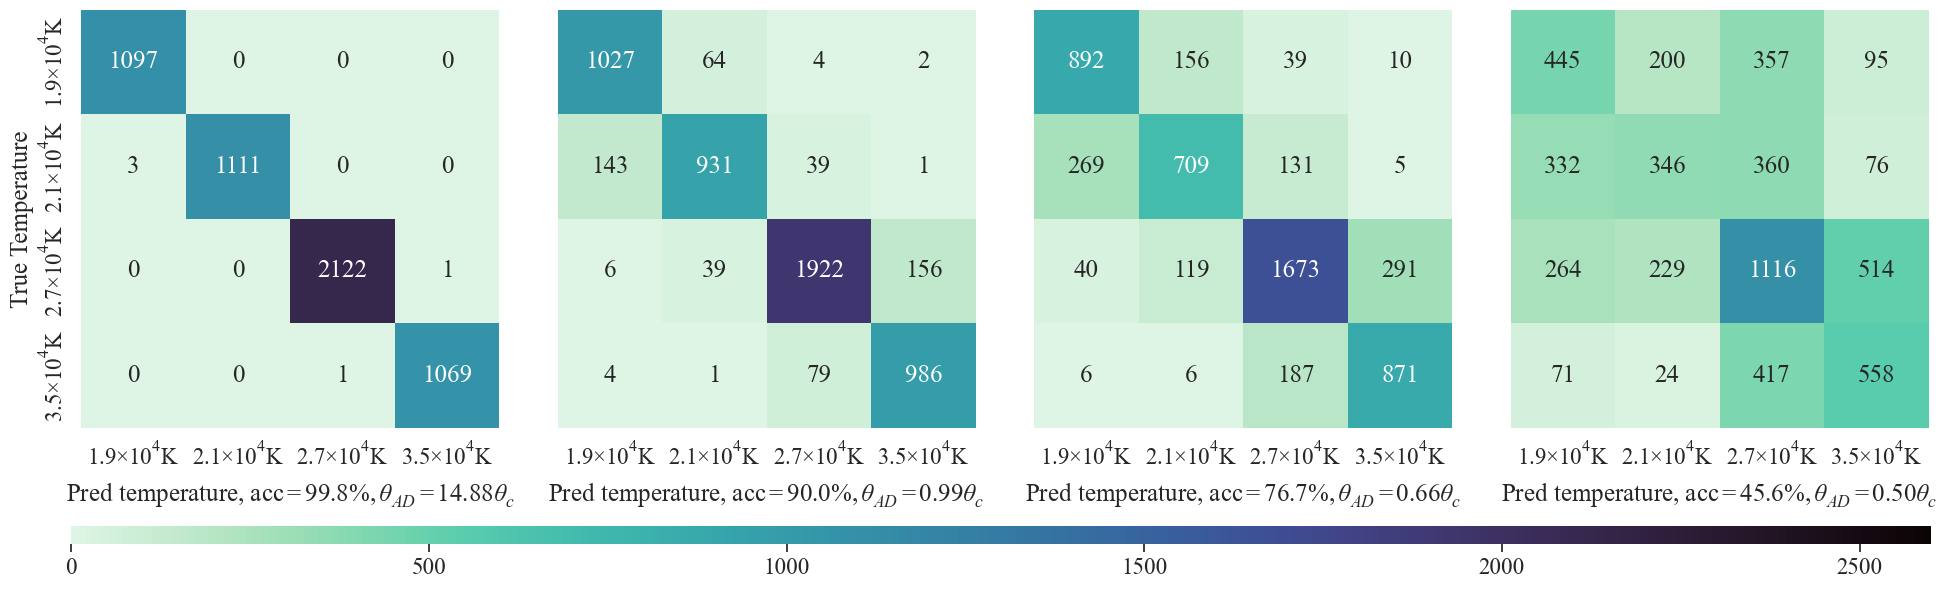

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6.1), sharey=True)
cbar_ax = fig.add_axes([.05, .08, .93, .03])
# cbar_ax = fig.add_axes([.91, .1, .03, .85])
palette = sns.color_palette('mako_r', as_cmap=True)
for index, csv_file in enumerate(csv_path):
    ax = axes[index]
    ax.set_aspect('equal')
    df_conf = pd.read_csv(f'csv/{csv_file}.csv', index_col=0)
    cm = df_conf.to_numpy()
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Tems)
    # disp.plot(cmap='Reds', ax=ax, colorbar=index==2)
    g = sns.heatmap(cm, ax=ax, annot=True, cmap=palette, fmt="n", cbar=index == 0,
                    cbar_ax=None if index else cbar_ax, vmin=0, vmax=2600,
                    xticklabels=Tems, yticklabels=Tems, cbar_kws={"orientation": "horizontal"})
    ax.set_xlabel(rf'Pred temperature, acc$={acc[index]*100:.1f}\%,\theta_{{AD}}={angular_sizes[index]*64/3.87e-3:.2f}\theta_c$', labelpad=9)
    g.set_xticklabels(g.get_xticklabels(), rotation=0)
    # ax._params(axis='x', which='major', pad=15)
    # ax.set_xticks(rotations=30)
    if index == 0:
        ax.set_ylabel('True Temperature')
        g.set_yticklabels(g.get_yticklabels(), rotation=90)
fig.tight_layout(rect=[0, 0.20, 1, 1])
plt.savefig(f'images/confusion4.png', dpi=200, bbox_inches='tight')
plt.savefig(f'images/confusion4.pdf', bbox_inches='tight')